In [1]:
import os
from pathlib import Path
import pandas as pd


import sys
from pathlib import Path
sys.path.insert(0,str(Path(os.path.abspath('.')).parent.parent))
import library.validation.accuracy.comparison as comparison
from eee.resource.validation.database import ValidationDatabase
import eee.solar.model.util

In [30]:
validation_database_path = Path.home()/"OneDrive-3E/Research/Solar/validation/validation_database"
plot_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3475_check_measurement_data/energydata

In [3]:
## instantiate validation database
db = ValidationDatabase(validation_database_path)

In [4]:
sites_inv = db.get_sites()
sites_inv

SitesInventory(n=291)

In [5]:
# sites_inv.df.name.unique()

In [6]:
site_name = ["pk_solar_khuzdar_buet"]

In [7]:
site_id = db.get_sites(names=site_name).site_ids[0]
site_id

'energydata_39'

In [8]:
site = sites_inv.get_site(site_id)
site

Site(name='pk_solar_khuzdar_buet')

# Reading

## measurement data

In [9]:
ts = db.get_measurement_timeseries(
    site=site,
    validation_variables=["ghi"],
)

In [10]:
ts.dict()

{'timeseries_variables': [{'variable': {'name': 'ghi',
    'physical_parameter_id': 'ghi',
    'units': <Unit('watt / meter ** 2')>,
    'height': None,
    'time_granularity': Timedelta('0 days 00:10:00'),
    'start': Timestamp('2015-09-22 11:10:00'),
    'end': Timestamp('2017-04-30 19:00:00'),
    'temporal_aggregation_method': <TemporalAggregationMethod.MEAN: 'mean'>,
    'temporal_aggregation_period': Timedelta('0 days 00:10:00'),
    'temporal_aggregation_timestamp_convention': <TemporalAggregationTimestampConvention.UNDEFINED: 'undefined'>,
    'data_availability_percent': None},
   'data': time
   2015-09-22 11:10:00+00:00    499.0
   2015-09-22 11:20:00+00:00    457.3
   2015-09-22 11:30:00+00:00    418.1
   2015-09-22 11:40:00+00:00    373.8
   2015-09-22 11:50:00+00:00    336.9
                                ...  
   2017-04-30 18:20:00+00:00      NaN
   2017-04-30 18:30:00+00:00      NaN
   2017-04-30 18:40:00+00:00      NaN
   2017-04-30 18:50:00+00:00      NaN
   2017-0

In [11]:
df = ts.to_dataframe()
df

,ghi_mean_10min_undefined
time,
2015-09-22 11:10:00+00:00,499.0
2015-09-22 11:20:00+00:00,457.3
2015-09-22 11:30:00+00:00,418.1
2015-09-22 11:40:00+00:00,373.8
2015-09-22 11:50:00+00:00,336.9
...,...
2017-04-30 18:20:00+00:00,NaN
2017-04-30 18:30:00+00:00,NaN
2017-04-30 18:40:00+00:00,NaN


In [12]:
start_time = df.first_valid_index()
end_time = df.last_valid_index()

### Convert to ire

In [13]:
df_converted = eee.solar.model.util.ire_to_irn(df)
df_converted

,ghi_mean_10min_undefined
time,
2015-09-22 11:10:00+00:00,83.166667
2015-09-22 11:20:00+00:00,76.216667
2015-09-22 11:30:00+00:00,69.683333
2015-09-22 11:40:00+00:00,62.300000
2015-09-22 11:50:00+00:00,56.150000
...,...
2017-04-30 18:20:00+00:00,NaN
2017-04-30 18:30:00+00:00,NaN
2017-04-30 18:40:00+00:00,NaN


### Resample

#### 1-d

In [14]:
df_converted_resampled_day = df_converted.resample('1D', origin=start_time, label='left', closed='left').sum()
df_converted_resampled_day

,ghi_mean_10min_undefined
time,
2015-09-22 11:10:00+00:00,7015.316667
2015-09-23 11:10:00+00:00,6566.116667
2015-09-24 11:10:00+00:00,6802.250000
2015-09-25 11:10:00+00:00,6923.966667
2015-09-26 11:10:00+00:00,6856.833333
...,...
2017-04-26 11:10:00+00:00,7717.383333
2017-04-27 11:10:00+00:00,7420.483333
2017-04-28 11:10:00+00:00,7554.966667


## simulation data

In [15]:
ts_sim = db.get_simulation_timeseries(
    site=site,
    validation_variables=["ghirrn"],
    model="solar-resource-api-1.6.12",
)

In [16]:
ts_sim

TimeseriesDataset(variables=[Variable(name=ghirrn)])

In [17]:
ts_sim.timeseries_variables[0].variable.start

Timestamp('2004-02-06 01:15:00')

In [18]:
ts_sim.to_dataframe()

,ghirrn_accumulated_15min_forward
time,
2004-02-06 01:15:00+00:00,0.00
2004-02-06 01:30:00+00:00,0.00
2004-02-06 01:45:00+00:00,0.00
2004-02-06 02:00:00+00:00,0.00
2004-02-06 02:15:00+00:00,0.00
...,...
2024-04-11 08:15:00+00:00,141.52
2024-04-11 08:30:00+00:00,106.64
2024-04-11 08:45:00+00:00,97.57


In [19]:
df_sim = ts_sim.to_dataframe()

In [20]:
df_sim = df_sim[start_time:end_time]
df_sim

,ghirrn_accumulated_15min_forward
time,
2015-09-22 11:15:00+00:00,99.03
2015-09-22 11:30:00+00:00,86.69
2015-09-22 11:45:00+00:00,73.72
2015-09-22 12:00:00+00:00,59.30
2015-09-22 12:15:00+00:00,45.27
...,...
2017-04-30 13:15:00+00:00,19.02
2017-04-30 13:30:00+00:00,10.86
2017-04-30 13:45:00+00:00,4.40


In [21]:
ts_sim.variables[0]

Variable(name=ghirrn)

In [22]:
ts_sim.variables[0].as_dict

{'name': 'ghirrn',
 'physical_parameter_id': 'ghirrn',
 'units': 'Wh/m²',
 'height': None,
 'time_granularity': '15min',
 'start': '2004-02-06 01:15:00',
 'end': '2024-04-11 09:15:00',
 'temporal_aggregation_method': 'accumulated',
 'temporal_aggregation_period': '15min',
 'temporal_aggregation_timestamp_convention': 'forward',
 'data_availability_percent': None}

### Resample

#### 1-d

In [23]:
df_sim_resampled_day = df_sim.resample('1D', origin=start_time, label='left', closed='left').sum()
df_sim_resampled_day

,ghirrn_accumulated_15min_forward
time,
2015-09-22 11:10:00+00:00,5926.78
2015-09-23 11:10:00+00:00,6201.45
2015-09-24 11:10:00+00:00,6042.46
2015-09-25 11:10:00+00:00,6047.10
2015-09-26 11:10:00+00:00,6032.89
...,...
2017-04-26 11:10:00+00:00,7873.12
2017-04-27 11:10:00+00:00,7824.11
2017-04-28 11:10:00+00:00,7937.35


In [24]:
ref_m = df_converted['ghi_mean_10min_undefined']
ref_m.index = pd.DatetimeIndex(ref_m.index)
mod_m = df_sim['ghirrn_accumulated_15min_forward']
mod_m.index = pd.DatetimeIndex(mod_m.index)

In [25]:
ref = df_converted_resampled_day['ghi_mean_10min_undefined']
ref.index = pd.DatetimeIndex(ref.index)
mod = df_sim_resampled_day['ghirrn_accumulated_15min_forward']
mod.index = pd.DatetimeIndex(mod.index)

# Plotting

## shift

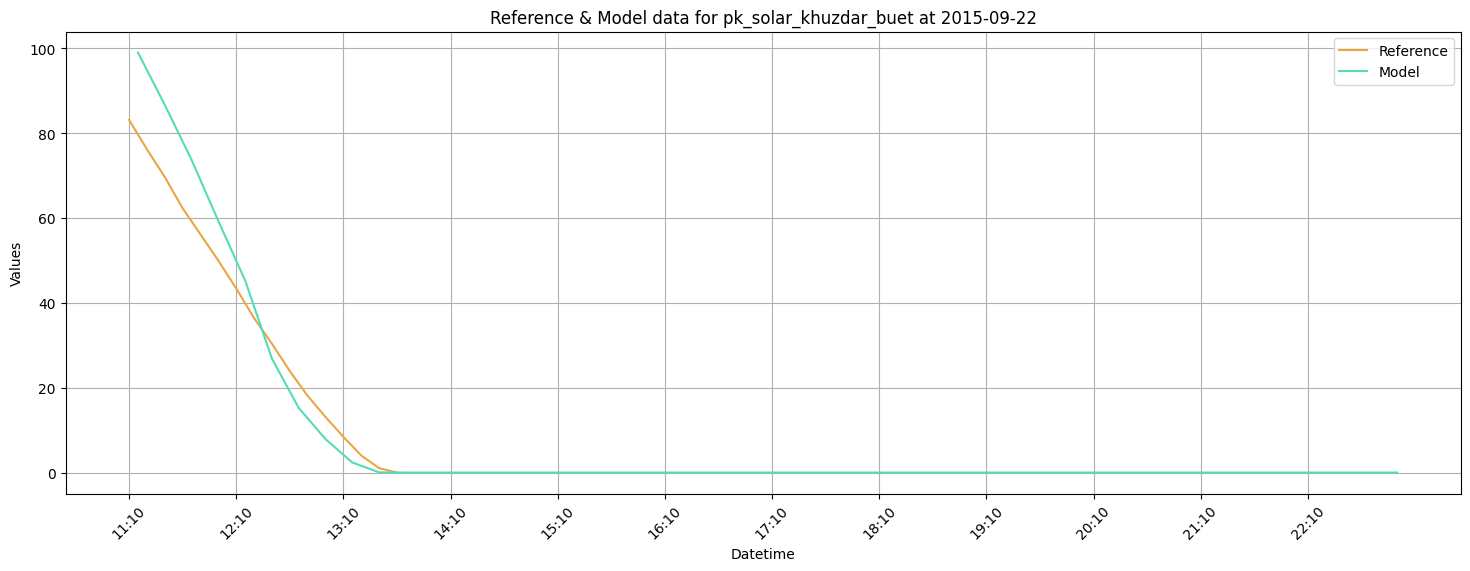

In [26]:
comparison.shift_check_start_end('pk_solar_khuzdar_buet', ref_m, mod_m, start_time, start=True)

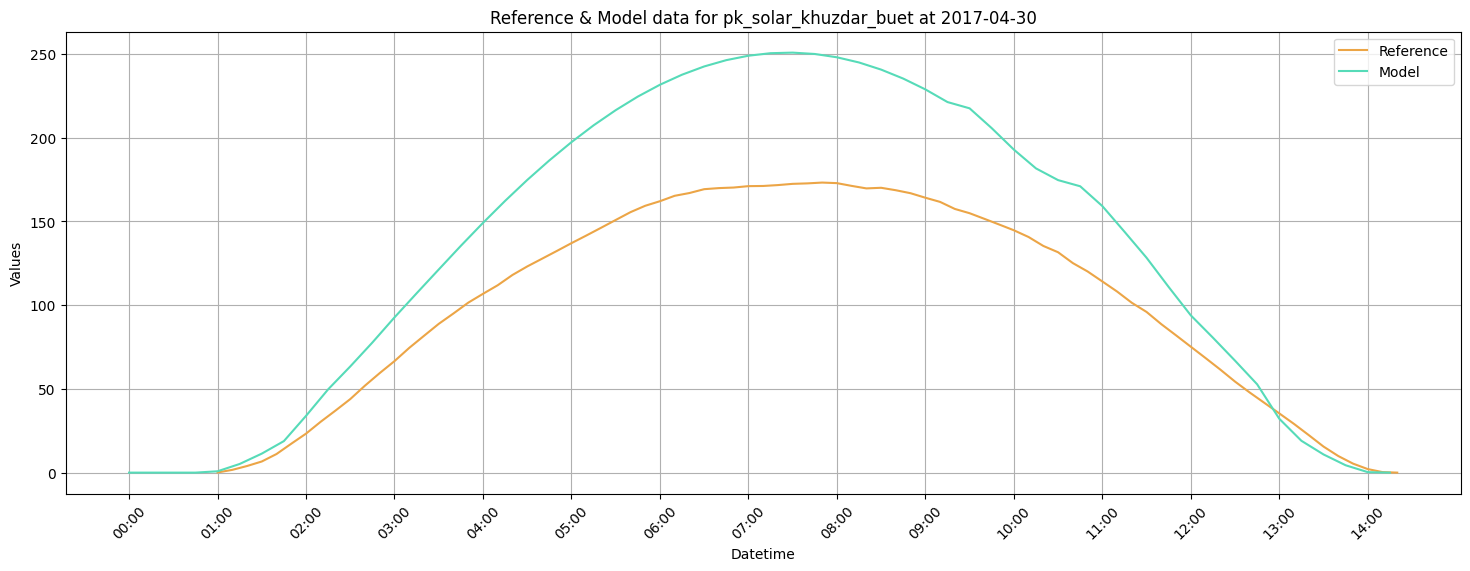

In [27]:
comparison.shift_check_start_end('pk_solar_khuzdar_buet', ref_m, mod_m, end_time)

## range

In [28]:
comparison.ref_mod_interactive('pk_solar_khuzdar_buet resampled by sum', ref, mod, plot_path)

## top

In [29]:
comparison.diff_ratio_merged('pk_solar_khuzdar_buet', ref, mod)

Top negative differences and ratios for pk_solar_khuzdar_buet:
                            difference     ratio
time                                            
2016-03-03 11:10:00+00:00 -1505.103333 -0.323513
2016-08-13 11:10:00+00:00 -1426.556667 -0.217099
2016-07-02 11:10:00+00:00 -1358.510000 -0.197003
2016-07-21 11:10:00+00:00 -1355.690000 -0.199607
2016-08-06 11:10:00+00:00 -1334.636667 -0.238706
2016-04-22 11:10:00+00:00 -1281.846667 -0.175937
2016-04-01 11:10:00+00:00 -1226.346667 -0.244369
2016-08-12 11:10:00+00:00 -1224.246667 -0.182632
2017-04-07 11:10:00+00:00 -1137.893333 -0.165647
2016-10-10 11:10:00+00:00 -1114.893333 -0.202263
2016-06-07 11:10:00+00:00 -1113.570000       NaN
2016-07-01 11:10:00+00:00 -1096.313333 -0.153495
2016-09-28 11:10:00+00:00 -1094.786667 -0.193453
2015-09-22 11:10:00+00:00 -1088.536667 -0.183664
2016-08-29 11:10:00+00:00 -1071.203333 -0.163925
2016-06-15 11:10:00+00:00 -1066.223333       NaN
2016-08-19 11:10:00+00:00 -1065.093333 -0.160098
2016-0